### Importing the necessary modules

In [1]:
#%matplotlib notebook
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
import numpy as np #numerical python used for working with arrays, mathematical operations
import pandas as pd
import xarray as xr
import time #useful for timing functions
import sys
import glob #glob is helpful for searching for filenames or directories
import scipy #scientific python
import pickle #for saving data
import skimage
from skimage import io
from importlib import reload

import ddm_analysis as da
import ddm_fit as df
import test_ddm as ddm
import mpfit_parameters_dictionaries as mpd
import helper_functions_cbf as hf

import yaml

In [2]:
ddm_analysis_parameters_str = """
DataDirectory: 'C:/Users/Ryan/Documents/GitHub/DDM-at-USD/ExampleData/'
FileName: 'images_nobin_40x_128x128_8bit.tif'
Metadata:
  pixel_size: 0.242 # size of pixel in um
  frame_rate: 41.7 #frames per second
Analysis_parameters:
  number_lagtimes: 40
  last_lag_time: 600
  binning: yes
  bin_size: 2 
Fitting_parameters:
  model: 'DDM Matrix - Single Exponential' 
  Tau: [1.0, 0.001, 10]
  StretchingExp: [1.0, 0.5, 1.1]
  Amplitude: [1e2, 1, 1e6]
  Background: [2.5e4, 0, 1e7]
  Good_q_range: [5, 20]
  Auto_update_good_q_range: True
"""
parameters_as_dictionary = yaml.safe_load(ddm_analysis_parameters_str)


File path to image data exists.
Provided metadata: {'pixel_size': 0.242, 'frame_rate': 41.7}
Image shape: 3000-by-128-by-128
Number of frames to use for analysis: 3000
Maximum lag time (in frames): 600
Number of lag times to compute DDM matrix: 20
Using the full frame, dimensions: 128-by-128.
Applying binning...
Dimensions after binning (3000, 64, 64), the new pixel size 0.484
The file C:/Users/Ryan/Documents/GitHub/DDM-at-USD/ExampleData/images_nobin_40x_128x128_8bit_numlagtimes_20_ddmmatrix.nc already exists. So perhaps the DDM matrix was calculated already?
Do you still want to calculate the DDM matrix? (y/n): y
Calculating the DDM matrix for images_nobin_40x_128x128_8bit.tif...
DDM matrix took 4.090810775756836 seconds to compute.
 Background estimate ± std is 336.15 ± 309.20


<IPython.core.display.Javascript object>


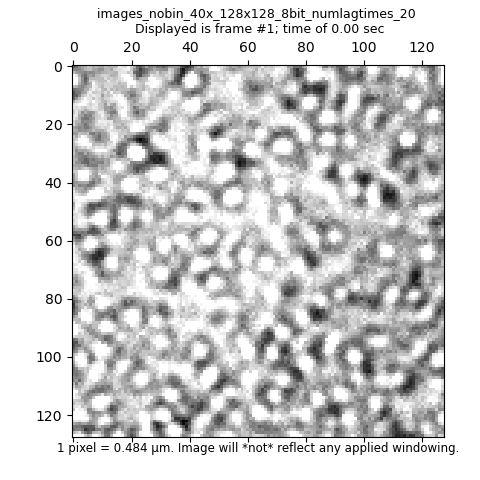

<IPython.core.display.Javascript object>


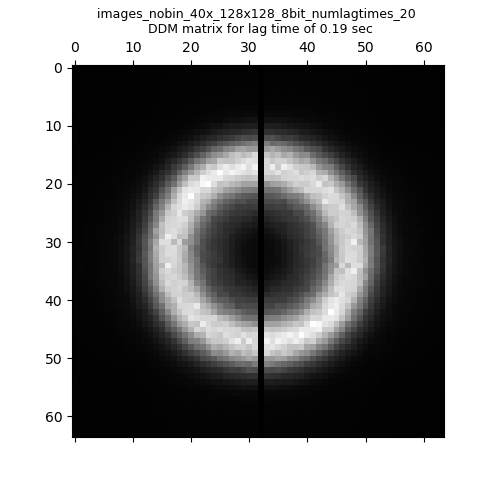

<IPython.core.display.Javascript object>


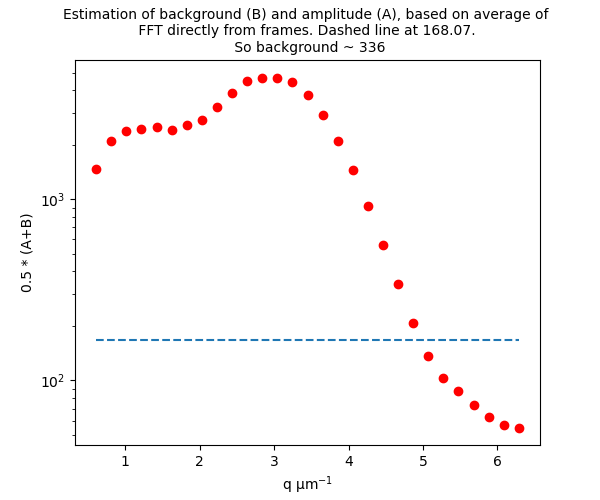

<IPython.core.display.Javascript object>


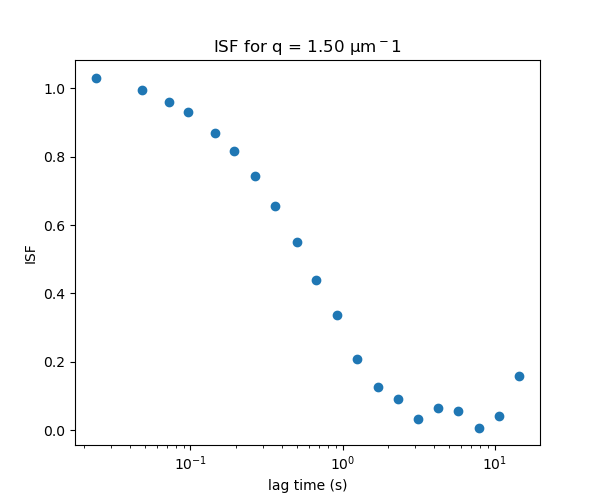

File path to image data exists.
Provided metadata: {'pixel_size': 0.242, 'frame_rate': 41.7}
Image shape: 3000-by-128-by-128
Number of frames to use for analysis: 3000
Maximum lag time (in frames): 600
Number of lag times to compute DDM matrix: 30
Using the full frame, dimensions: 128-by-128.
Applying binning...
Dimensions after binning (3000, 64, 64), the new pixel size 0.484
Calculating the DDM matrix for images_nobin_40x_128x128_8bit.tif...
DDM matrix took 5.903367280960083 seconds to compute.
 Background estimate ± std is 336.15 ± 309.20


<IPython.core.display.Javascript object>


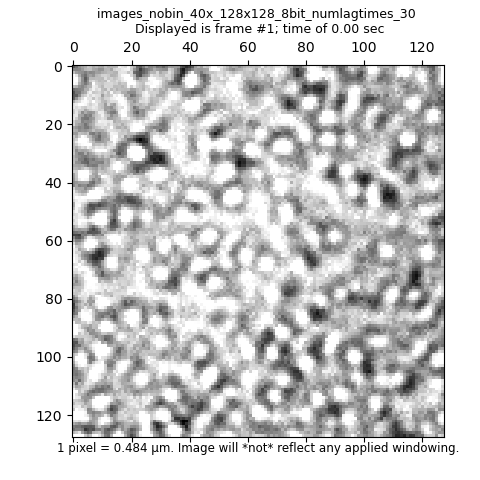

<IPython.core.display.Javascript object>


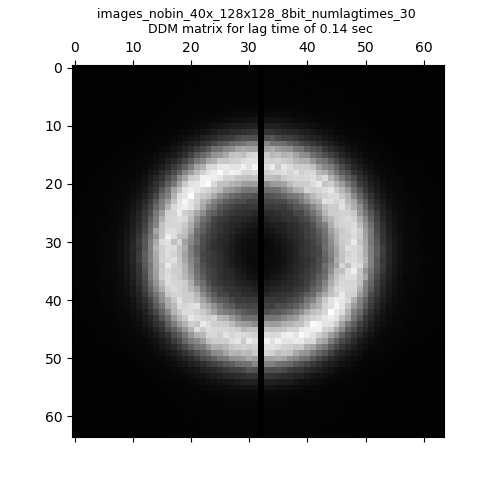

<IPython.core.display.Javascript object>


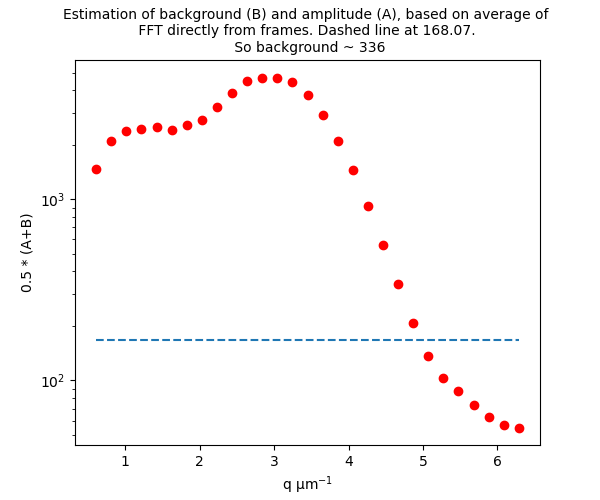

<IPython.core.display.Javascript object>


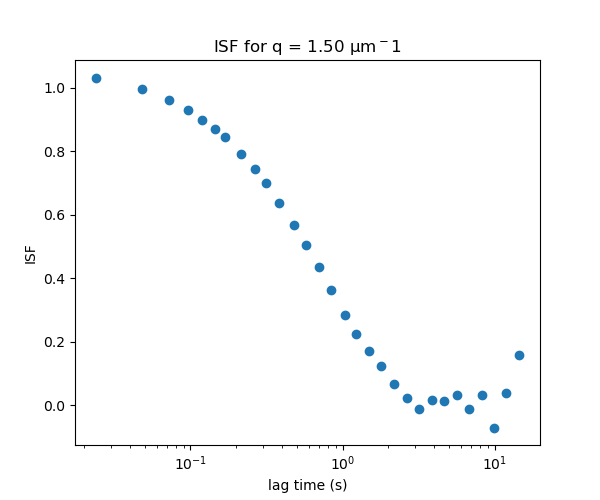

File path to image data exists.
Provided metadata: {'pixel_size': 0.242, 'frame_rate': 41.7}
Image shape: 3000-by-128-by-128
Number of frames to use for analysis: 3000
Maximum lag time (in frames): 600
Number of lag times to compute DDM matrix: 40
Using the full frame, dimensions: 128-by-128.
Applying binning...
Dimensions after binning (3000, 64, 64), the new pixel size 0.484
Calculating the DDM matrix for images_nobin_40x_128x128_8bit.tif...
DDM matrix took 7.346864938735962 seconds to compute.
 Background estimate ± std is 336.15 ± 309.20


<IPython.core.display.Javascript object>


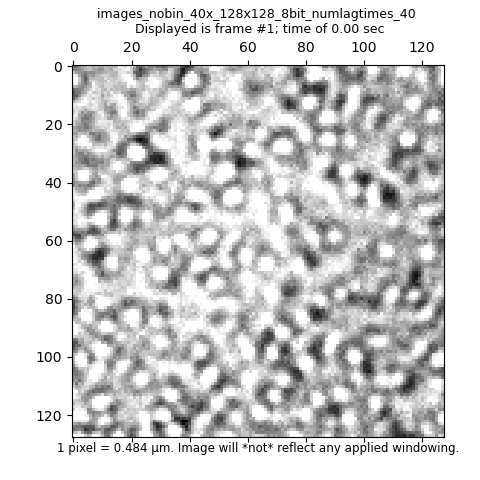

<IPython.core.display.Javascript object>


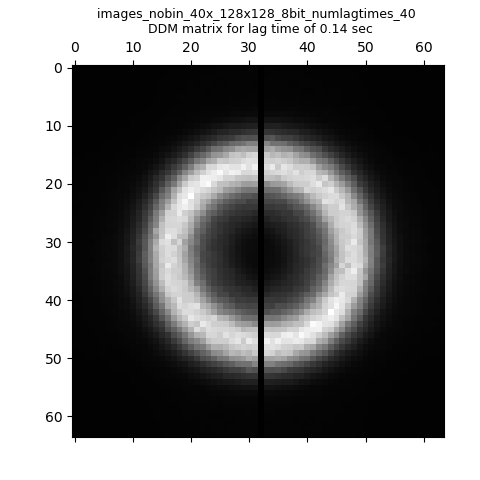

<IPython.core.display.Javascript object>


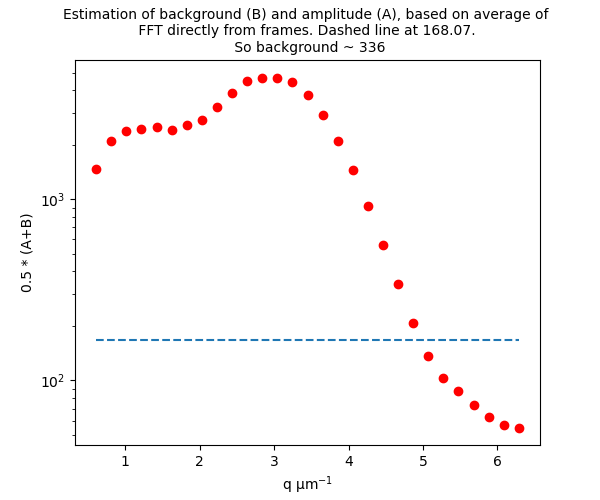

<IPython.core.display.Javascript object>


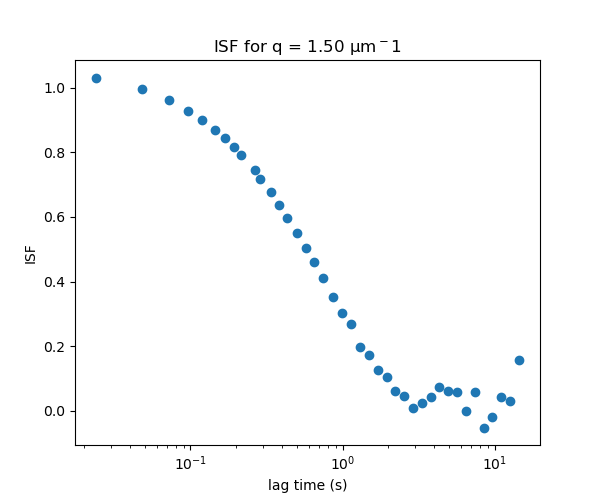

File path to image data exists.
Provided metadata: {'pixel_size': 0.242, 'frame_rate': 41.7}
Image shape: 3000-by-128-by-128
Number of frames to use for analysis: 3000
Maximum lag time (in frames): 600
Number of lag times to compute DDM matrix: 50
Using the full frame, dimensions: 128-by-128.
Applying binning...
Dimensions after binning (3000, 64, 64), the new pixel size 0.484
Calculating the DDM matrix for images_nobin_40x_128x128_8bit.tif...
DDM matrix took 8.996282577514648 seconds to compute.
 Background estimate ± std is 336.15 ± 309.20


<IPython.core.display.Javascript object>


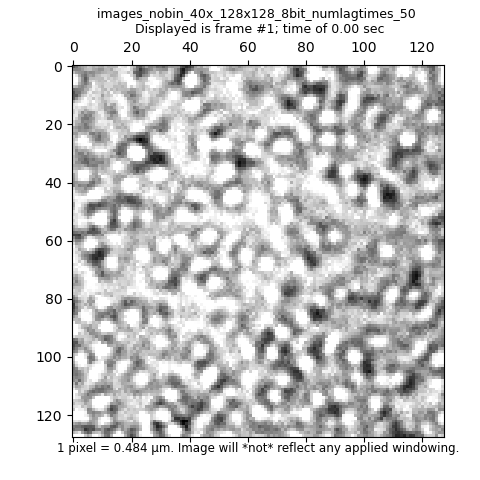

<IPython.core.display.Javascript object>


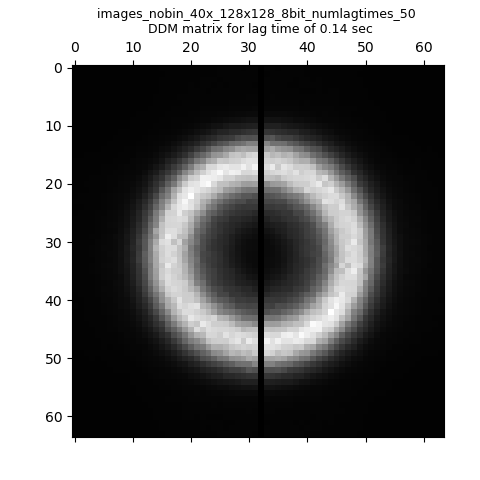

<IPython.core.display.Javascript object>


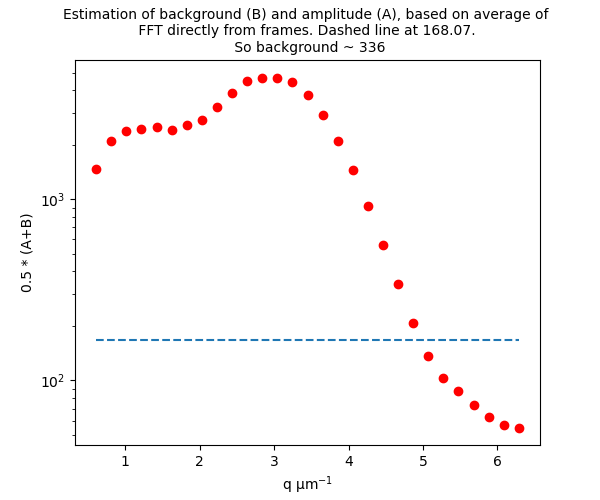

<IPython.core.display.Javascript object>


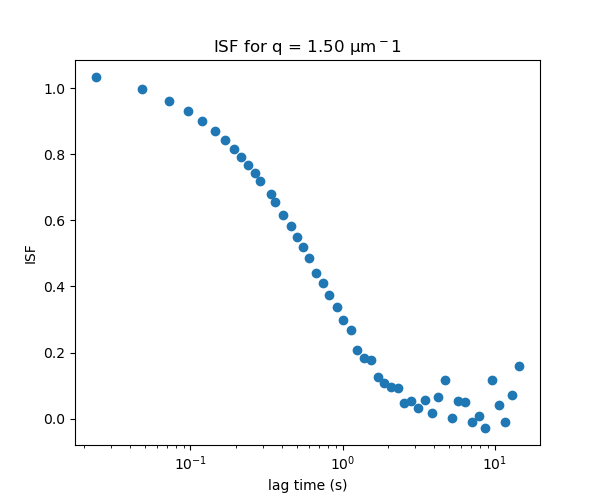

In [3]:
for num_lagtimes in [20,30,40,50]:
    parameters_as_dictionary['Analysis_parameters']['number_lagtimes'] = num_lagtimes
    parameters_as_dictionary['Analysis_parameters']['filename_for_saved_data'] = 'images_nobin_40x_128x128_8bit_numlagtimes_%i' % num_lagtimes
    ddmclass = da.DDM_analysis(parameters_as_dictionary)
    ddmclass.calculate_DDM_matrix(quiet = True)